In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [52]:
def initialize_parameters(layers):
    # Define He Initializer for ReLu activations and GlorotNormal for last unit that will be a sigmoid activation
    initializerHe = tf.keras.initializers.HeNormal(seed=1)
    initializerGn = tf.keras.initializers.GlorotNormal(seed=1)
    
    parameters = {}
    dims = len(layers) - 1
    
    for i in range(1, dims):
        parameters["W" + str(i)] = tf.Variable(initializerHe(shape=(layers[i], layers[i-1])))
        parameters["b" + str(i)] = tf.Variable(initializerHe(shape=(layers[i], 1)))

    parameters["W" + str(dims)] = tf.Variable(initializerGn(shape=(layers[dims], layers[dims-1])))
    parameters["b" + str(dims)] = tf.Variable(initializerGn(shape=(layers[dims], 1)))
    
    return parameters

In [31]:
print(initialize_parameters([13, 10, 1]))

{'W1': <tf.Variable 'Variable:0' shape=(10, 13) dtype=float32, numpy=
array([[ 0.06439073, -0.2506563 ,  0.32090592, -0.40106028, -0.46258327,
        -0.20294088, -0.0193803 ,  0.23794131, -0.00762046, -0.71328866,
         0.8716632 , -0.70061535,  0.19026978],
       [ 0.34706226, -0.10948427, -0.26533306, -0.08479563, -0.29952168,
        -0.00447669, -0.1092835 ,  0.14877783,  0.03333988, -0.09162068,
         0.5977041 ,  0.3480738 ,  0.53042334],
       [ 0.1255909 ,  0.37428537,  0.01557167, -0.674318  , -0.08367024,
         0.01026453,  0.27419996, -0.4339634 , -0.15213068, -0.20063405,
        -0.53623706, -0.43535993, -0.29751697],
       [-0.5824216 ,  0.82517034,  0.08212346,  0.27582204,  0.7849591 ,
         0.36793438, -0.15945162,  0.381502  , -0.36267906,  0.21312976,
        -0.1979997 ,  0.14408536,  0.2477363 ],
       [-0.728163  , -0.2747505 , -0.32440132, -0.24019793,  0.15501687,
        -0.27034608, -0.6305018 ,  0.22762525,  0.42153302,  0.27486998,
        

In [105]:
def forward_propagation(X, parameters, layers):
    dims = len(layers) - 1
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    Z_temp = tf.math.add(tf.linalg.matmul(W1,X), b1)
    A_temp = tf.keras.activations.relu(Z_temp)
    
    for i in range(2, dims):
        Z_temp = tf.math.add(tf.linalg.matmul(parameters["W" + str(i)],A_temp), parameters["b" + str(i)])
        A_temp = tf.keras.activations.relu(Z_temp)
        
    Z_temp = tf.math.add(tf.linalg.matmul(parameters["W" + str(dims)],A_temp), parameters["b" + str(dims)])
    A_temp = tf.keras.activations.sigmoid(Z_temp)

    return Z_temp

In [110]:
def compute_cost(predicted_Y, true_Y):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return bce(true_Y, predicted_Y)

In [40]:
def model(X_train, Y_train, learning_rate = 0.0001, num_epochs = 1500, layers = [1], print_cost = True):
    
    # Save all the costs around the training
    costs = []
    
    # Initialize the parameters
    parameters = initialize_parameters(layers)
    trainable_variables = []
    for i in range(1, len(layers)-1):
        trainable_variables.append(parameters["W" + str(i)])
        trainable_variables.append(parameters["b" + str(i)])
    # print(trainable_variables)
    
    # I want to use the Adam optimizer in my model, in my experience, it's very efficient
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            # Do the fordward propagation
            Z3 = forward_propagation(X_train, parameters, layers)

            # Compute the cost function
            cost = compute_cost(Z3, Y_train)

        grads = tape.gradient(cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))

        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, cost))

        costs.append(cost)
    
    return parameters, costs

In [7]:
df_heart = pd.read_csv("./Dataset/HeartDataset.csv")
df_normalized = df_heart.copy()
df_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.preprocessing import MinMaxScaler
columnsToNormalize = ['age', 'trestbps', 'chol', 'thalach']
for column in columnsToNormalize:
    df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))
df_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


In [12]:
train_Y = np.array(df_heart['target'])
df_normalized.drop(['target'], axis=1, inplace=True)
train_Y = train_Y.astype('float32')
train_Y = train_Y.reshape(299,1)
train_Y = tf.transpose(train_Y)
print(train_Y.shape)

(1, 299)


In [13]:
train_X = np.array(df_normalized.values)
train_X = train_X.astype('float32')
train_X = tf.transpose(train_X)
print(train_X.shape)

(13, 299)


Cost after epoch 0: 1.072925
Cost after epoch 10: 1.015951
Cost after epoch 20: 0.963340
Cost after epoch 30: 0.915678
Cost after epoch 40: 0.871998
Cost after epoch 50: 0.831152
Cost after epoch 60: 0.793443
Cost after epoch 70: 0.759120
Cost after epoch 80: 0.727905
Cost after epoch 90: 0.699363
Cost after epoch 100: 0.673022
Cost after epoch 110: 0.648549
Cost after epoch 120: 0.626141
Cost after epoch 130: 0.605917
Cost after epoch 140: 0.587569
Cost after epoch 150: 0.570822
Cost after epoch 160: 0.555610
Cost after epoch 170: 0.541525
Cost after epoch 180: 0.528677
Cost after epoch 190: 0.516948
Cost after epoch 200: 0.506334
Cost after epoch 210: 0.496610
Cost after epoch 220: 0.487706
Cost after epoch 230: 0.479530
Cost after epoch 240: 0.472005
Cost after epoch 250: 0.465238
Cost after epoch 260: 0.459006
Cost after epoch 270: 0.453217
Cost after epoch 280: 0.447845
Cost after epoch 290: 0.442995
Cost after epoch 300: 0.438553
Cost after epoch 310: 0.434446
Cost after epoch 32

Cost after epoch 2600: 0.300224
Cost after epoch 2610: 0.299940
Cost after epoch 2620: 0.299669
Cost after epoch 2630: 0.299382
Cost after epoch 2640: 0.299105
Cost after epoch 2650: 0.298821
Cost after epoch 2660: 0.298540
Cost after epoch 2670: 0.298268
Cost after epoch 2680: 0.297984
Cost after epoch 2690: 0.297708
Cost after epoch 2700: 0.297429
Cost after epoch 2710: 0.297149
Cost after epoch 2720: 0.296873
Cost after epoch 2730: 0.296592
Cost after epoch 2740: 0.296315
Cost after epoch 2750: 0.296041
Cost after epoch 2760: 0.295762
Cost after epoch 2770: 0.295484
Cost after epoch 2780: 0.295210
Cost after epoch 2790: 0.294937
Cost after epoch 2800: 0.294658
Cost after epoch 2810: 0.294383
Cost after epoch 2820: 0.294116
Cost after epoch 2830: 0.293843
Cost after epoch 2840: 0.293563
Cost after epoch 2850: 0.293290
Cost after epoch 2860: 0.293027
Cost after epoch 2870: 0.292744
Cost after epoch 2880: 0.292465
Cost after epoch 2890: 0.292193
Cost after epoch 2900: 0.291924
Cost aft

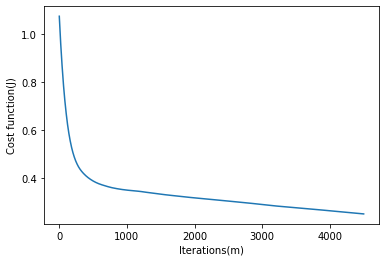

In [124]:
num_epochsTrain = 4500 #9500 #4500 #7200
layers_train = [13, 10, 5, 1]
parameters, costs = model(train_X, train_Y, learning_rate = 0.0009, layers=layers_train , num_epochs = num_epochsTrain)
plt.plot(np.arange(num_epochsTrain)+1, costs)
plt.xlabel("Iterations(m)")
plt.ylabel("Cost function(J)")
plt.show()

In [57]:
df_testing = pd.read_csv("./Dataset/TestingDataset.csv")
for column in columnsToNormalize:
    df_testing[column] = MinMaxScaler().fit_transform(np.array(df_testing[column]).reshape(-1,1))

test_Y = np.array(df_testing['target'])
df_testing.drop(['target'], axis=1, inplace=True)
test_Y = test_Y.astype('float32')
test_Y = test_Y.reshape(test_Y.shape[0],1)
test_X = np.array(df_testing.values)
test_X = test_X.astype('float32')
test_X = tf.transpose(test_X)
test_Y = tf.transpose(test_Y)

df_testing.head()
print(test_X.shape)
print(test_Y.shape)

(13, 91)
(1, 91)


In [125]:
Z3 = forward_propagation(test_X, parameters, layers=layers_train)
A3 = tf.keras.activations.sigmoid(Z3)
A3 = tf.math.round(A3)
print(A3)
trueVector = A3 == test_Y
goodPredictionsCounter = trueVector.numpy().sum()
perc = (goodPredictionsCounter/test_Y.shape[1]) * 100
print("The accuracy on the testing Dataset was of %i: " % (perc))

Z3 = forward_propagation(train_X, parameters, layers=layers_train)
A3 = tf.keras.activations.sigmoid(Z3)
A3 = tf.math.round(A3)
print(A3)
trueVector = A3 == train_Y
goodPredictionsCounter = trueVector.numpy().sum()
perc = (goodPredictionsCounter/train_Y.shape[1]) * 100
print("The accuracy on the train Dataset was of %i: " % (perc))

tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]], shape=(1, 91), dtype=float32)
The accuracy on the testing Dataset was of 90: 
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 0

In [129]:
# Best model at the momment
best_model = parameters
best_layers = layers_train